# **Plotting Skin Friction *'C<sub>f</sub>'***

This notebook explains how to plot skin friction *C<sub>f</sub>* along with x-direction. As a bash script called *'Allrun'* will be executed, this python code will simultaneously executed in order to plot *C<sub>f</sub>*. In this case, we do not need to execute the python again. However, we should export this notebook to **'PlotCf.py'** file and copy it to each case folder that we would like to simulate.

In [1]:
#!/usr/bin/env python
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
#mpl.rc('text', usetex=True)

## **1. Importing Related Variables from *'Allrun'* Shell Script**

In order to reduce the amount of code lines, we need to import some related values (e.g. farfield velocity, kinematic viscosity, model name, yplus, and residual limits) from the *'Allrun'* script. All the variables except *'model'* are numbers, and therefore they are immediately changed to float or int. Regarding *'yp'* variable, it will be an integer value if the original *'yp'* does not contain any periods (i.e. it is not decimal), and vice versa. The list *'res_list'* contains all the different limit residuals for **SIMPLE** residual control.

In [2]:
# These lines that are commented out for the purpose of testing in jupyter notebook.
'''
UInf = 69.4
nuInf = 1.388e-05
model = "kOmegaSST"
yp = 1
res_list = ['1e-3', '1e-4']
'''
UInf = float(os.environ["UInf"])
nuInf = float(os.environ["nuInf"])
model = os.environ["model"]
yp = os.environ["yp"]
if (yp.find('.') == -1):
    yp = int(os.environ["yp"])
else:
    yp = float(os.environ["yp"])
res_list = os.getenv('res_list').split(',')
res_list = res_list[1:]

'\nUInf = float(os.environ["UInf"])\nnuInf = float(os.environ["nuInf"])\nmodel = os.environ["model"]\nyp = os.environ["yp"]\nif (yp.find(\'.\') == -1):\n    yp = int(os.environ["yp"])\nelse:\n    yp = float(os.environ["yp"])\nres_list = os.getenv(\'res_list\').split(\',\')\nres_list = res_list[1:]\n'

## **2. Load Data**
A \*.*csv* file that is created during simulation is loaded to python. For this case, we need to calculate with various residual limits, and hence *'tauw_path'* should be a list that contains each residual limit value. In addition, *'.head()'* is used for checking top 5 rows and all columns are well divided. Here, only values of the first residual (1e-3) are checked.

In [3]:
# This line that is commented out for the purpose of testing in jupyter notebook.
#tauw_path = ['../run/turbulentFlatPlate1/yplus_{}/tauw_{}_{}_{}.csv'.format(str(yp), model, str(yp), res_list[i]) for i in range(len(res_list))]
tauw_path = ['yplus_{}/tauw_{}_{}_{}.csv'.format(str(yp), model, str(yp), res_list[i]) for i in range(len(res_list))]
tauw_data = [pd.read_csv(tauw_path[j], delim_whitespace=True) for j in range(len(res_list))]
tauw_data[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.8177,-0.940282,0
1,0.001458,-19.9242,-0.094822,0
2,0.002433,-14.5330,-0.018149,0
3,0.003410,-12.0972,-0.009261,0
4,0.004390,-10.7113,-0.005757,0


## **3. Calculation of *'Re<sub>x</sub>'* and *'C<sub>f</sub>'***

*'Re<sub>x</sub>'* should be calculated for x-axis, and *'C<sub>f</sub>'* is to be found for y-axis. This simulation case is incompressible, and thus only the kinematic viscosity is used. *'Re<sub>x</sub>'* needs not to be a list since the coordinates of the cell centers are the same, whereras *'C<sub>f</sub>'* is a list.

In [4]:
x0 = 0
Rex = (tauw_data[0]['ccx'] - x0)*UInf/nuInf
Cf = [np.sqrt(tauw_data[k]['tau_xx']*tauw_data[k]['tau_xx'] + tauw_data[k]['tau_yy']*tauw_data[k]['tau_yy'] + tauw_data[k]['tau_zz']*tauw_data[k]['tau_zz'])/(0.5*UInf**2) for k in range(len(res_list))]

## **4. Experimental Data by Wieghardt**

The experimental data is to be calculated for comparing between simulation and experimental data.

In [5]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

## **5. Plot**

Skin friction *'C<sub>f</sub>'* is plotted along with *'Re<sub>x</sub>'*. Since we execute this code in the shell script which contains loops for several yplus values, graphs for each case will be created in the case folder as a \*.*pdf* format.

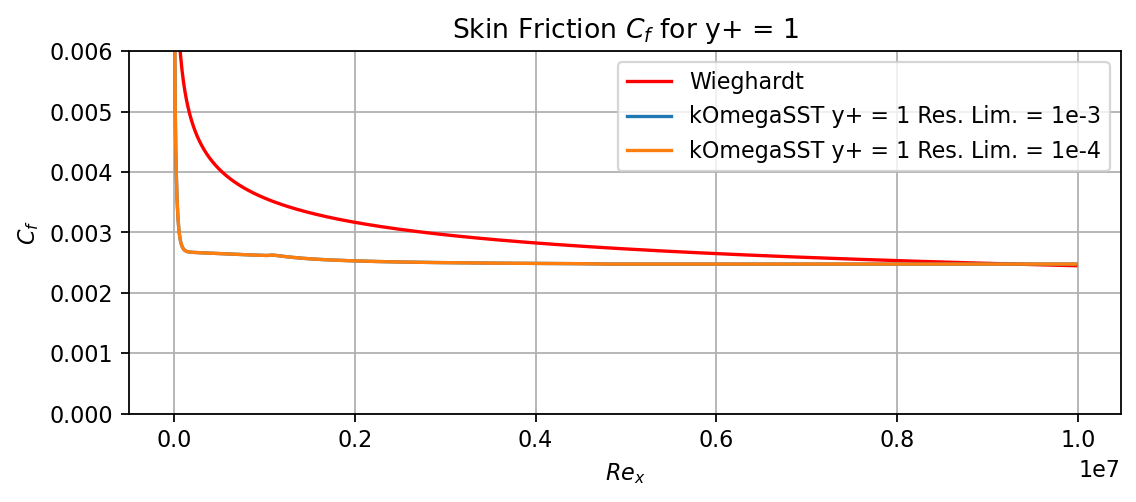

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
plt.title(r"Skin Friction $C_f$ for y+ = {}".format(str(yp)))
ax.set_xlabel(r"$Re_x$")
ax.set_ylabel(r"$C_f$")
ax.plot(Rex, wieghardt, color = 'r', label = "Wieghardt")
for l in range(len(res_list)):
    ax.plot(Rex, Cf[l], label = "{} y+ = {} Res. Lim. = {}".format(model, str(yp), res_list[l]))    
    ax.legend()
plt.savefig("yplus_{}/tauw_{}_{}.pdf".format(str(yp), model, str(yp)), bbox_inches="tight")